Dùng thư viện yahoo finace tải dataset

In [36]:
import yfinance as yf

data = yf.download(tickers = "NEM", start="2017-12-01", end="2023-06-16", interval='1d')
data


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-01,37.070000,37.610001,36.779999,37.189999,31.313101,5074400
2017-12-04,37.240002,37.240002,36.660000,36.840000,31.018410,3777300
2017-12-05,36.599998,36.799999,36.070000,36.200001,30.479544,5984100
2017-12-06,36.250000,36.400002,35.779999,35.830002,30.168013,5797400
2017-12-07,35.529999,36.130001,35.450001,35.919998,30.307222,4047700
...,...,...,...,...,...,...
2023-06-09,41.930000,42.009998,41.290001,41.459999,41.459999,5601300
2023-06-12,41.400002,42.070000,41.279999,42.040001,42.040001,6618100
2023-06-13,42.250000,42.549999,42.090000,42.439999,42.439999,7955900


In [37]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-01,37.070000,37.610001,36.779999,37.189999,31.313101,5074400
2017-12-04,37.240002,37.240002,36.660000,36.840000,31.018410,3777300
2017-12-05,36.599998,36.799999,36.070000,36.200001,30.479544,5984100
2017-12-06,36.250000,36.400002,35.779999,35.830002,30.168013,5797400
2017-12-07,35.529999,36.130001,35.450001,35.919998,30.307222,4047700
...,...,...,...,...,...,...
2023-06-09,41.930000,42.009998,41.290001,41.459999,41.459999,5601300
2023-06-12,41.400002,42.070000,41.279999,42.040001,42.040001,6618100
2023-06-13,42.250000,42.549999,42.090000,42.439999,42.439999,7955900


In [38]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [39]:
data = data.reset_index('Date', inplace=False)

In [40]:
# 2. Đọc file dữ liệu giá vàng GC=F và chia train test validate theo tỉ lệ 7:2:1
data = data[['Close']]
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [41]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [42]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [43]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[81.54437806 81.58247732 81.62057658 81.65867583 81.69677509 81.73487435
 81.7729736  81.81107286 81.84917212 81.88727138 81.92537063 81.96346989
 82.00156915 82.0396684  82.07776766 82.11586692 82.15396617 82.19206543
 82.23016469 82.26826395 82.3063632  82.34446246 82.38256172 82.42066097
 82.45876023 82.49685949 82.53495874 82.573058   82.61115726 82.64925651]


In [44]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)


Validation RMSE: 31.90283678657915
Testing RMSE: 18.86703531475695


In [45]:
# 12. Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 18.86703531475695
Validation RMSE: 31.90283678657915
Testing MAE: 15.045636389414323
Validation MAE: 31.59795190668059
Testing MAPE: 0.31012938421377145
Validation MAPE: 0.6788865366030241


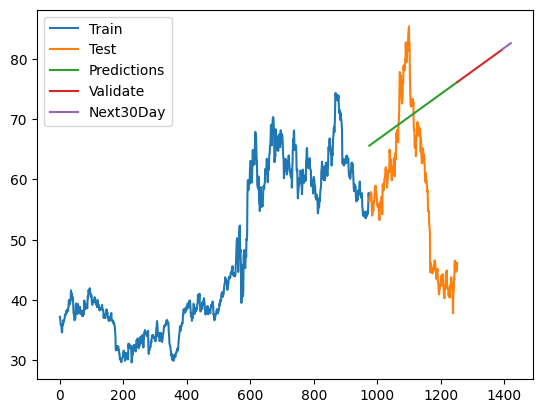

In [46]:


# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()